In [54]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df_nifty = pd.DataFrame({'ds':nifty_data.index, 'y': nifty_data['Close']})
print(df_nifty)

                   ds             y
Date                               
2014-04-07 2014-04-07   6695.049805
2014-04-09 2014-04-09   6796.200195
2014-04-10 2014-04-10   6796.399902
2014-04-11 2014-04-11   6776.299805
2014-04-15 2014-04-15   6733.100098
...               ...           ...
2024-07-12 2024-07-12  24502.150391
2024-07-15 2024-07-15  24586.699219
2024-07-16 2024-07-16  24613.000000
2024-07-18 2024-07-18  24800.849609
2024-07-19 2024-07-19  24530.900391

[2523 rows x 2 columns]


In [56]:
model_prophet_nifty = Prophet()
model_prophet_nifty.fit(df_nifty)

13:57:28 - cmdstanpy - INFO - Chain [1] start processing
13:57:29 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future_nifty = model_prophet_nifty.make_future_dataframe(periods=365)
forecast_nifty = model_prophet_nifty.predict(future_nifty)
print(future_nifty)
print(forecast_nifty)

             ds
0    2014-04-07
1    2014-04-09
2    2014-04-10
3    2014-04-11
4    2014-04-15
...         ...
2883 2025-07-15
2884 2025-07-16
2885 2025-07-17
2886 2025-07-18
2887 2025-07-19

[2888 rows x 1 columns]
             ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2014-04-07   7059.685846   6307.283026   7516.690126   7059.685846   
1    2014-04-09   7069.082172   6302.319890   7545.485165   7069.082172   
2    2014-04-10   7073.780335   6348.439924   7615.880271   7073.780335   
3    2014-04-11   7078.478498   6331.530904   7615.908379   7078.478498   
4    2014-04-15   7097.271150   6392.711467   7651.930064   7097.271150   
...         ...           ...           ...           ...           ...   
2883 2025-07-15  26194.726076  24317.259685  28925.663245  24058.413757   
2884 2025-07-16  26203.827131  24235.796540  28917.217652  24059.635374   
2885 2025-07-17  26212.928185  24317.587888  28808.567414  24063.236172   
2886 2025-07-18  26222.029239  24

In [58]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv_nifty = cross_validation(model_prophet_nifty, initial = '730 days', period = '180 days', horizon = '30 days')
df_p_nifty = performance_metrics(df_cv_nifty)
print("\n Performance metrics:", df_cv_nifty)

  0%|          | 0/17 [00:00<?, ?it/s]

13:57:35 - cmdstanpy - INFO - Chain [1] start processing
13:57:36 - cmdstanpy - INFO - Chain [1] done processing
13:57:36 - cmdstanpy - INFO - Chain [1] start processing
13:57:36 - cmdstanpy - INFO - Chain [1] done processing
13:57:36 - cmdstanpy - INFO - Chain [1] start processing
13:57:36 - cmdstanpy - INFO - Chain [1] done processing
13:57:37 - cmdstanpy - INFO - Chain [1] start processing
13:57:37 - cmdstanpy - INFO - Chain [1] done processing
13:57:37 - cmdstanpy - INFO - Chain [1] start processing
13:57:37 - cmdstanpy - INFO - Chain [1] done processing
13:57:38 - cmdstanpy - INFO - Chain [1] start processing
13:57:38 - cmdstanpy - INFO - Chain [1] done processing
13:57:38 - cmdstanpy - INFO - Chain [1] start processing
13:57:39 - cmdstanpy - INFO - Chain [1] done processing
13:57:39 - cmdstanpy - INFO - Chain [1] start processing
13:57:39 - cmdstanpy - INFO - Chain [1] done processing
13:57:40 - cmdstanpy - INFO - Chain [1] start processing
13:57:40 - cmdstanpy - INFO - Chain [1]


 Performance metrics:             ds          yhat    yhat_lower    yhat_upper             y  \
0   2016-08-01   8630.445339   8437.801384   8836.354836   8636.549805   
1   2016-08-02   8619.029517   8429.687571   8824.892761   8622.900391   
2   2016-08-03   8633.714307   8422.852263   8824.306855   8544.849609   
3   2016-08-04   8638.913871   8437.390547   8830.200760   8551.099609   
4   2016-08-05   8636.127423   8443.045893   8851.495874   8683.150391   
..         ...           ...           ...           ...           ...   
341 2024-07-12  22665.718064  22038.281702  23264.601087  24502.150391   
342 2024-07-15  22721.974646  22115.265038  23355.578568  24586.699219   
343 2024-07-16  22754.385557  22136.797088  23325.720185  24613.000000   
344 2024-07-18  22783.455975  22150.446501  23421.726595  24800.849609   
345 2024-07-19  22787.144869  22161.785695  23400.017976  24530.900391   

        cutoff  
0   2016-07-31  
1   2016-07-31  
2   2016-07-31  
3   2016-07-31  
4  

In [59]:
df_p_nifty = performance_metrics(df_cv_nifty)
print(df_p_nifty)

   horizon           mse         rmse          mae      mape     mdape  \
0   3 days  7.750503e+05   880.369432   559.175371  0.037001  0.029166   
1   4 days  7.155147e+05   845.881021   540.486295  0.035693  0.029563   
2   5 days  1.022411e+06  1011.143611   655.805926  0.042445  0.033159   
3   6 days  1.544488e+06  1242.774319   845.138473  0.053209  0.040315   
4   7 days  1.737309e+06  1318.070210   917.080719  0.058177  0.054185   
5   8 days  1.682748e+06  1297.207863   886.559736  0.056481  0.046144   
6   9 days  1.463080e+06  1209.578644   809.454401  0.051251  0.022159   
7  10 days  1.100151e+06  1048.880907   712.345182  0.045412  0.022634   
8  11 days  9.460997e+05   972.676556   687.042023  0.044326  0.031642   
9  12 days  1.222405e+06  1105.624437   807.941193  0.051887  0.043494   
10 13 days  1.653711e+06  1285.966871   955.363668  0.061570  0.061249   
11 14 days  1.971256e+06  1404.014106  1049.420479  0.068215  0.066416   
12 15 days  2.000695e+06  1414.459212 

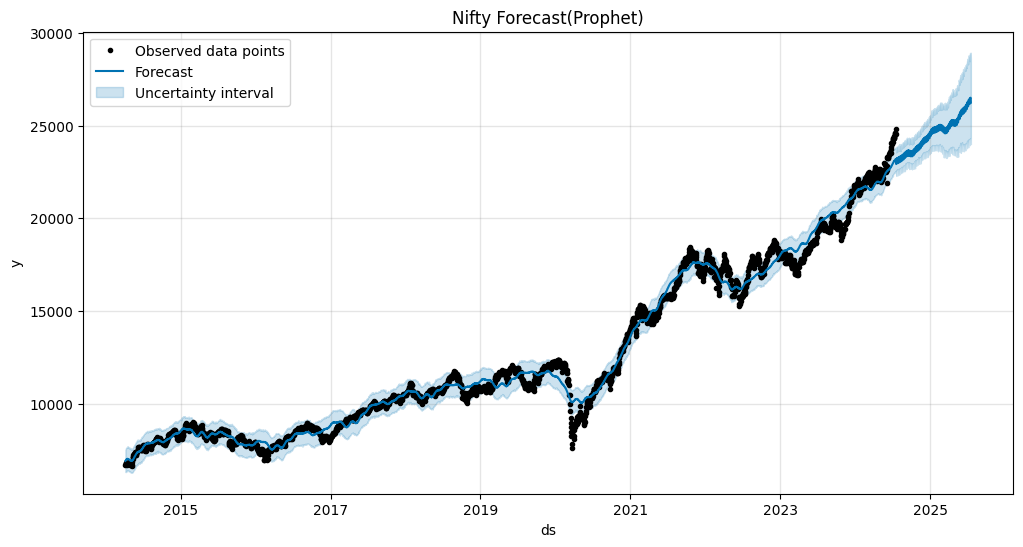

In [62]:
fig_nifty, ax = plt.subplots(figsize=(12,6))
model_prophet_nifty.plot(forecast_nifty, ax=ax)
ax.legend()
plt.title('Nifty Forecast(Prophet)')
plt.show()